# Modèle VAR (Vector Auto Regression) 

La modélisation VAR est utilisée pour capturer les relations linéaires entre plusieurs séries temporelles. VAR est une extension de l'AR (Auto Regression) pour de multiples séries parallèles. 

Les étapes pour construire un modèle VAR sont les suivantes :

## Compréhension et préparation des données
Il est nécessaire de comprendre les données et de s'assurer qu'elles sont correctement structurées pour l'analyse VAR. Cela comprend la mise en forme des données en séries temporelles et le traitement des valeurs manquantes si nécessaire.

## Vérification de la stationnarité
Avant d'appliquer un modèle VAR, les séries temporelles doivent être stationnaires. Une série temporelle est dite stationnaire si ses propriétés statistiques (moyenne, variance) restent constantes dans le temps. Le test de Dickey-Fuller augmenté est souvent utilisé pour vérifier la stationnarité. 

## Transformation des données si nécessaire
Si les séries temporelles ne sont pas stationnaires, il est nécessaire de les rendre stationnaires. Une méthode couramment utilisée est la différenciation, qui consiste à soustraire la valeur précédente de la série à la valeur actuelle.

## Sélection de l'ordre du modèle VAR
La sélection de l'ordre est une étape essentielle dans la modélisation VAR. Cela peut être fait en utilisant des critères tels que le critère d'information d'Akaike (AIC) ou le critère d'information bayésien (BIC).

## Construction et ajustement du modèle VAR
Après avoir déterminé l'ordre approprié, le modèle VAR est construit et ajusté aux données. 

## Évaluation du modèle
Une fois le modèle ajusté, il est nécessaire d'évaluer sa performance. Cela peut être fait en examinant les statistiques de résumé du modèle et en effectuant des tests de diagnostic.

## Prédiction avec le modèle
Le modèle ajusté est ensuite utilisé pour faire des prévisions. 

## Validation des prédictions
Enfin, il est important de valider les prédictions du modèle en les comparant aux valeurs réelles. Différentes mesures d'erreur, comme l'erreur quadratique moyenne (MSE) ou l'erreur absolue moyenne (MAE), peuvent être utilisées pour évaluer la précision des prédictions.


# Importation des packages et chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
# Charger les données
df = pd.read_csv('ice_cream_vs_heater.csv')
df

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21
...,...,...,...
193,2020-02,34,45
194,2020-03,25,44
195,2020-04,25,53
196,2020-05,27,70


In [13]:
#type de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      198 non-null    object
 1   heater     198 non-null    int64 
 2   ice cream  198 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [14]:
# Convertir la colonne 'Month' en datetime
df['Month'] = pd.to_datetime(df['Month'])



In [15]:
df

,Month,heater,ice cream
0,2004-01-01,27,13
1,2004-02-01,18,15
2,2004-03-01,14,16
3,2004-04-01,13,19
4,2004-05-01,13,21
...,...,...,...
193,2020-02-01,34,45
194,2020-03-01,25,44
195,2020-04-01,25,53
196,2020-05-01,27,70


In [16]:
# Définir 'Month' comme index
df = df.set_index('Month')
df

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21
...,...,...
2020-02-01,34,45
2020-03-01,25,44
2020-04-01,25,53


In [17]:
df

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21
...,...,...
2020-02-01,34,45
2020-03-01,25,44
2020-04-01,25,53


# Description des données

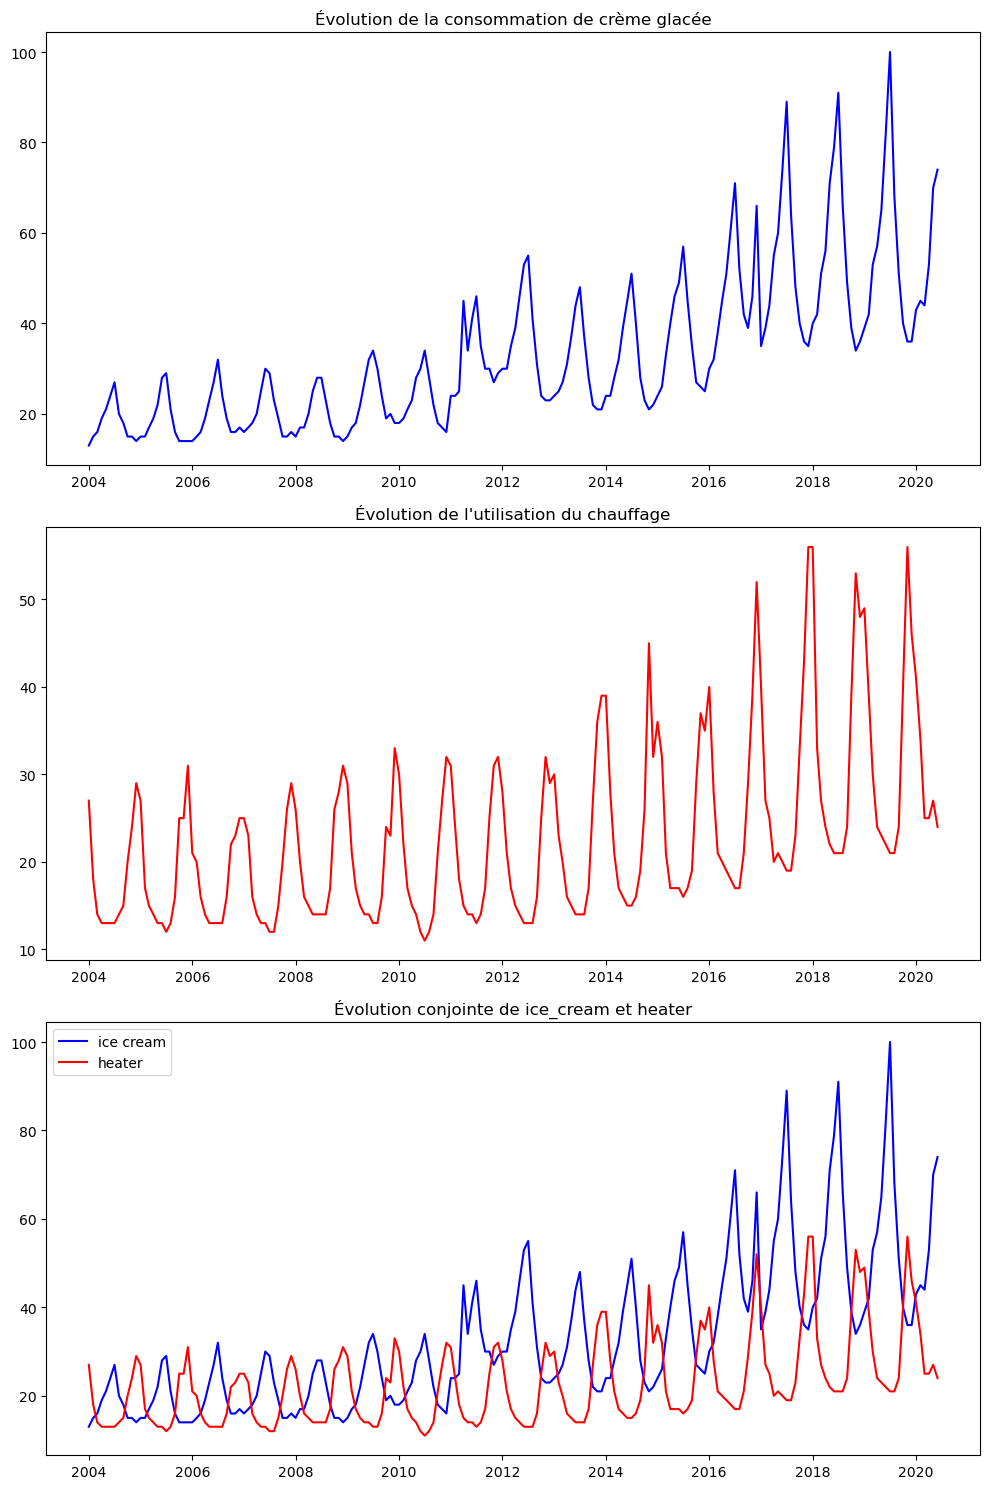

In [18]:
# Description des données
# Créer une figure et des axes
fig, axs = plt.subplots(3, 1, figsize=(10,15))

# Faire le premier sous-graphique pour ice_cream
axs[0].plot(df.index, df['ice cream'], color='blue')
axs[0].set_title('Évolution de la consommation de crème glacée')

# Faire le deuxième sous-graphique pour heater
axs[1].plot(df.index, df['heater'], color='red')
axs[1].set_title('Évolution de l\'utilisation du chauffage')

# Faire le troisième sous-graphique pour ice_cream et heater
axs[2].plot(df.index, df['ice cream'], color='blue', label='ice cream')
axs[2].plot(df.index, df['heater'], color='red', label='heater')
axs[2].set_title('Évolution conjointe de ice_cream et heater')
axs[2].legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

# Analyse de la stationnarité

Un prérequis pour de nombreux modèles de séries temporelles, y compris le modèle VAR, est que les données soient stationnaires. Une série temporelle est dite stationnaire si ses propriétés statistiques (comme la moyenne et la variance) restent constantes dans le temps. 

Il existe plusieurs tests pour vérifier la stationnarité d'une série temporelle :

## Test de Dickey-Fuller augmenté (ADF)

Le test de Dickey-Fuller augmenté (ADF) est un test statistique couramment utilisé pour déterminer si une série temporelle est stationnaire. L'hypothèse nulle de ce test est que la série a une unité racine, c'est-à-dire qu'elle est non stationnaire. Si la p-value obtenue par le test est inférieure à un certain seuil (généralement 0.05), alors on peut rejeter l'hypothèse nulle et conclure que la série est stationnaire.

## Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Le test KPSS est un autre test statistique utilisé pour vérifier la stationnarité d'une série temporelle. Contrairement à l'ADF, l'hypothèse nulle pour le test KPSS est que la série est stationnaire. Si la p-value obtenue par le test est supérieure à un certain seuil, alors on ne peut pas rejeter l'hypothèse nulle et on peut conclure que la série est stationnaire.

## Autres méthodes

Il existe également d'autres tests de stationnarité, comme le test de Phillips-Perron et le test DF-GLS.

En outre, la visualisation des données (par exemple, à l'aide de graphiques de séries temporelles, de graphiques d'autocorrélation, etc.) peut également aider à déterminer si une série est stationnaire ou non.




Results for column heater:
ADF Statistic: 0.950111
p-value: 0.993711
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575

Results for column ice cream:
ADF Statistic: -0.303933
p-value: 0.924945
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


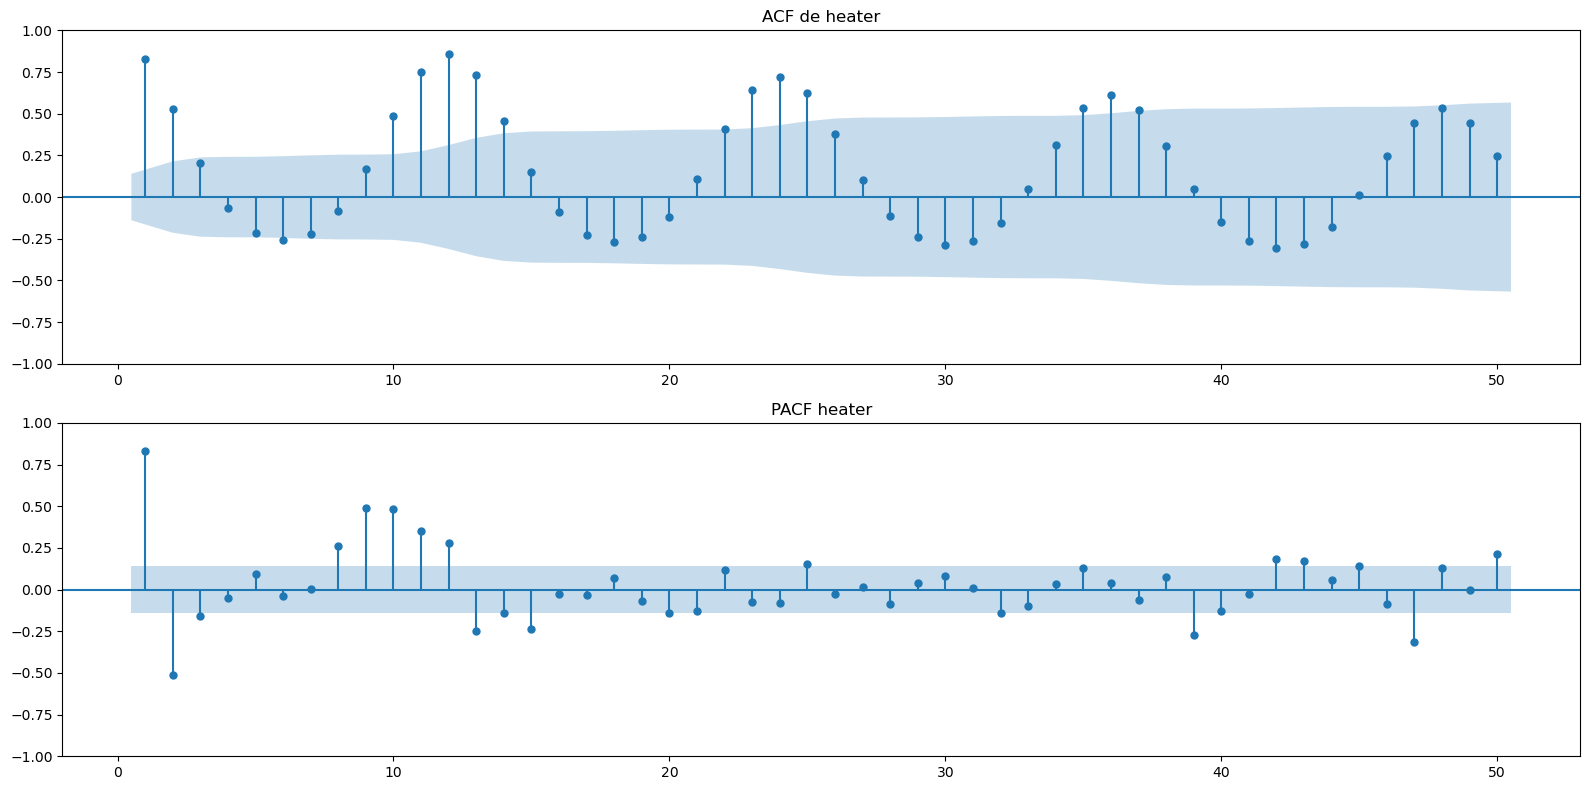

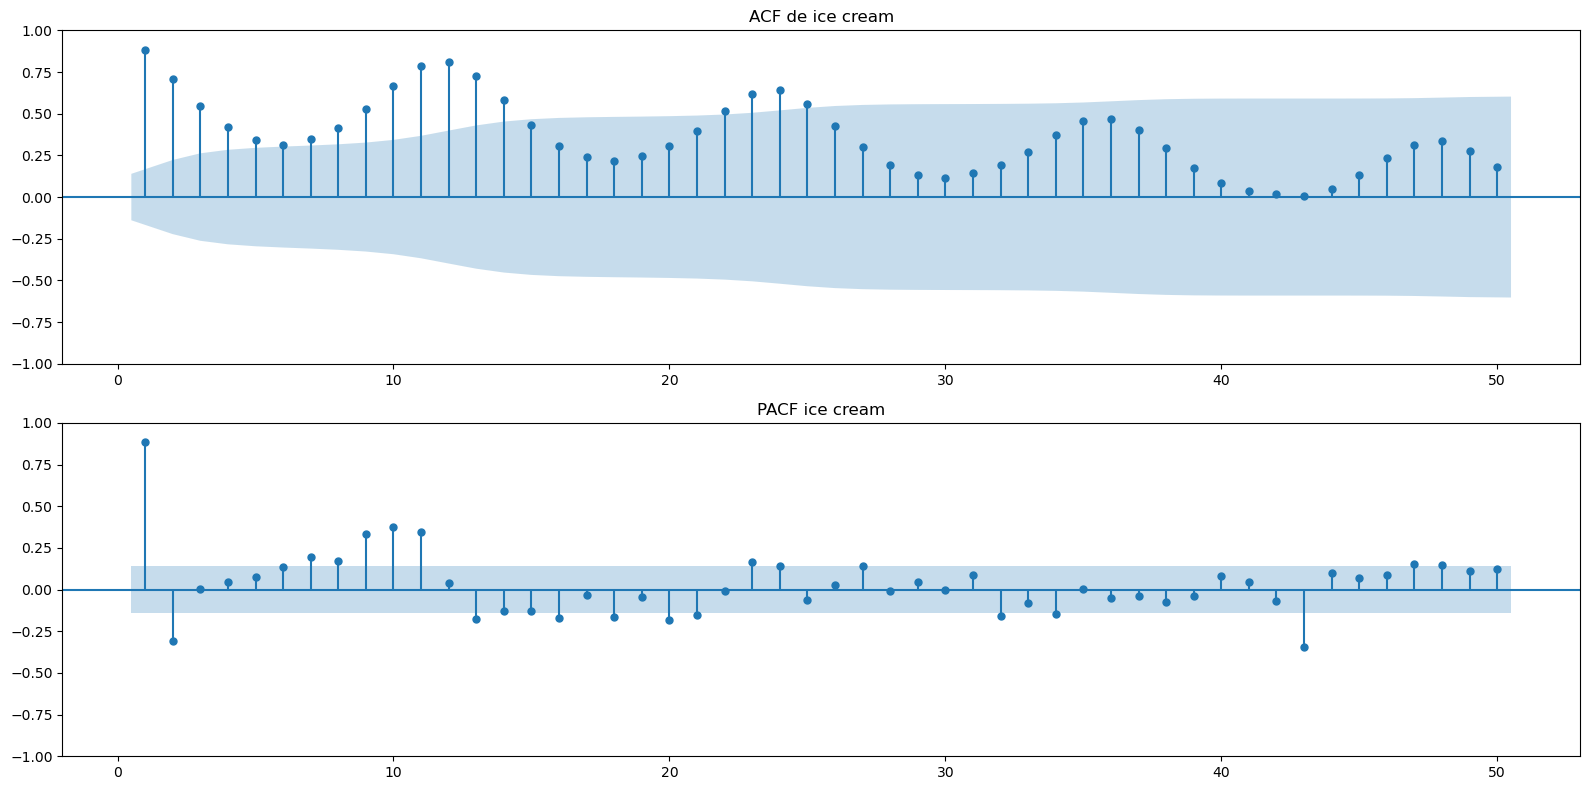

In [8]:

# Faire les tests de Dickey-Fuller augmenté
for column in df.columns:
    result = adfuller(df[column])
    print(f"\nResults for column {column}:")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Faire les graphiques ACF et PACF pour chaque colonne
for column in df.columns:
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))
    plot_acf(df[column], lags=50, zero=False, ax=ax1)
    ax1.set_title(f"ACF de {column}")
    plot_pacf(df[column], lags=50, zero=False, ax=ax2)
    ax2.set_title(f"PACF {column}")
    plt.tight_layout()
    plt.show()

# Transformation pour rendre la série stationnaire

In [19]:
# Différencier les séries de données et les ajouter au DataFrame
df_diff = df.diff().dropna()
df_diff.columns = [f"{col}_diff" for col in df.columns]
df = pd.concat([df, df_diff], axis=1)
df

,heater,ice cream,heater_diff,ice cream_diff
Month,,,,
2004-01-01,27,13,NaN,NaN
2004-02-01,18,15,-9.0,2.0
2004-03-01,14,16,-4.0,1.0
2004-04-01,13,19,-1.0,3.0
2004-05-01,13,21,0.0,2.0
...,...,...,...,...
2020-02-01,34,45,-7.0,2.0
2020-03-01,25,44,-9.0,-1.0
2020-04-01,25,53,0.0,9.0


In [20]:
df=df.dropna()
df

,heater,ice cream,heater_diff,ice cream_diff
Month,,,,
2004-02-01,18,15,-9.0,2.0
2004-03-01,14,16,-4.0,1.0
2004-04-01,13,19,-1.0,3.0
2004-05-01,13,21,0.0,2.0
2004-06-01,13,24,0.0,3.0
...,...,...,...,...
2020-02-01,34,45,-7.0,2.0
2020-03-01,25,44,-9.0,-1.0
2020-04-01,25,53,0.0,9.0


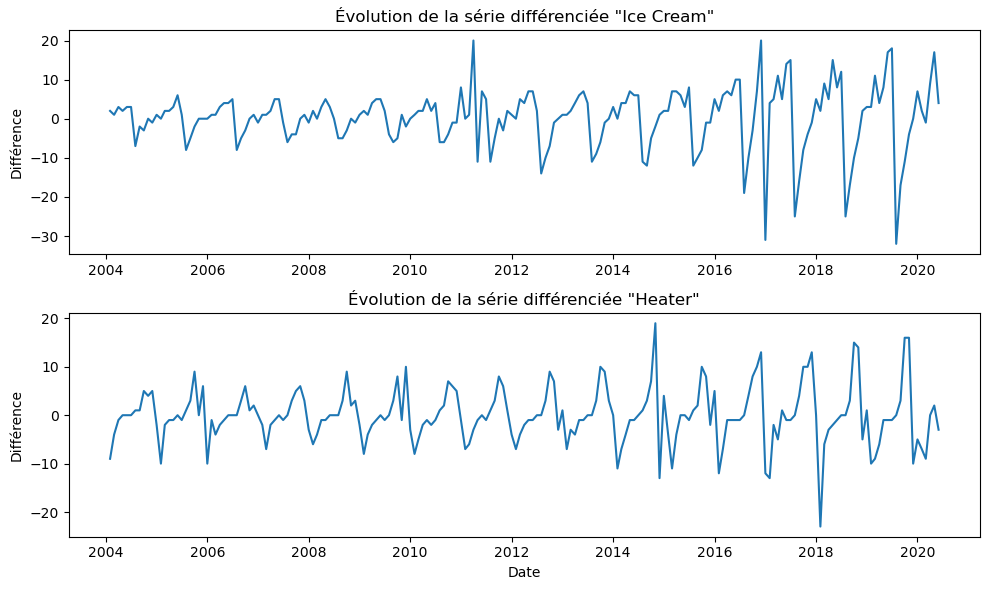

In [21]:

# Tracer les graphiques
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(df_diff.index, df_diff['ice cream_diff'])
plt.title('Évolution de la série différenciée "Ice Cream"')
plt.ylabel('Différence')

plt.subplot(2, 1, 2)
plt.plot(df_diff.index, df_diff['heater_diff'])
plt.title('Évolution de la série différenciée "Heater"')
plt.xlabel('Date')
plt.ylabel('Différence')

plt.tight_layout()
plt.show()


Results for column heater_diff:
ADF Statistic: -16.967314
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575

Results for column ice cream_diff:
ADF Statistic: -4.781718
p-value: 0.000059
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


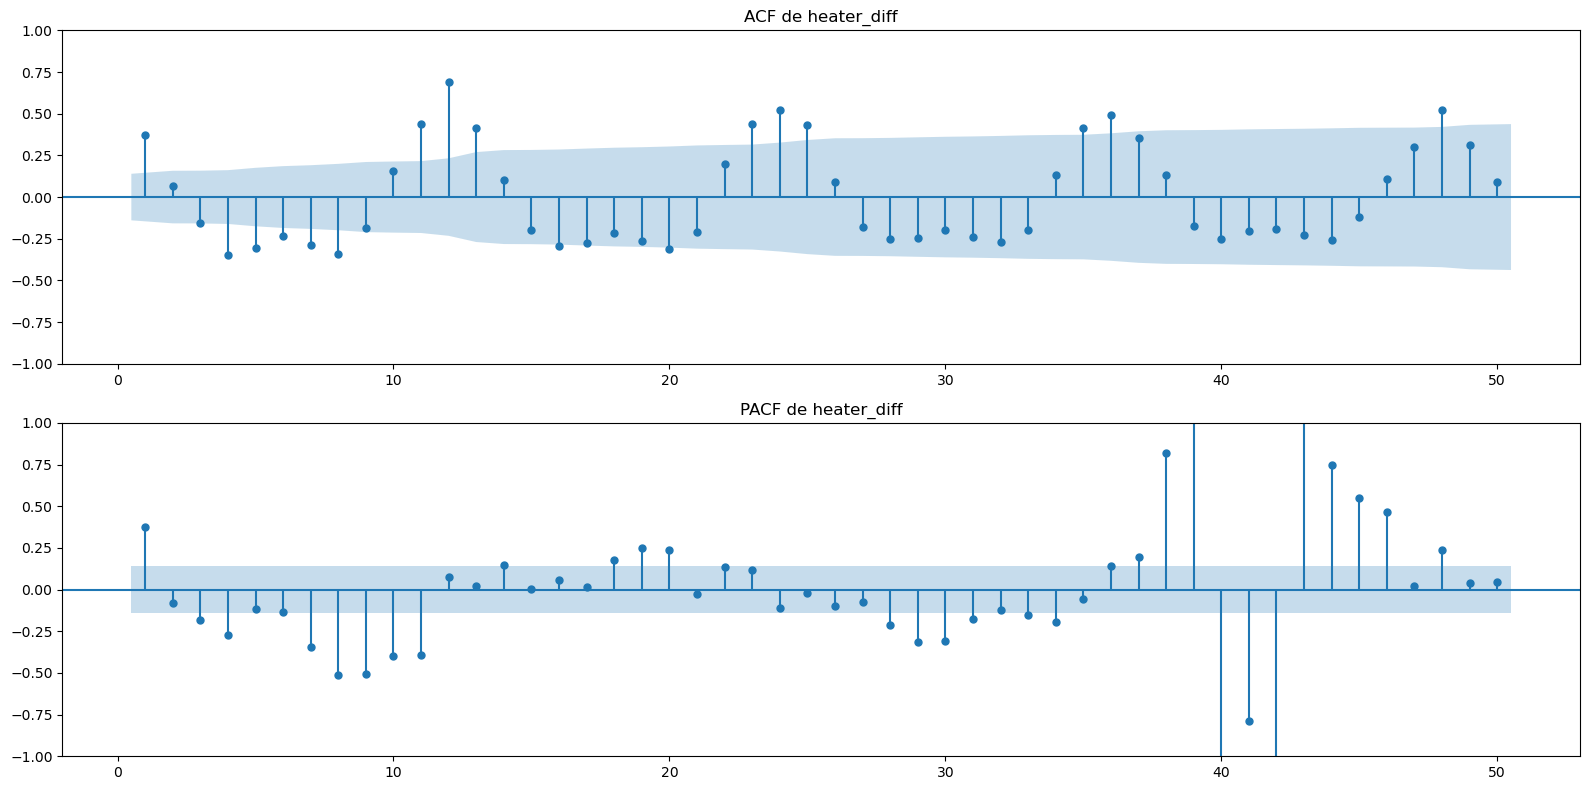

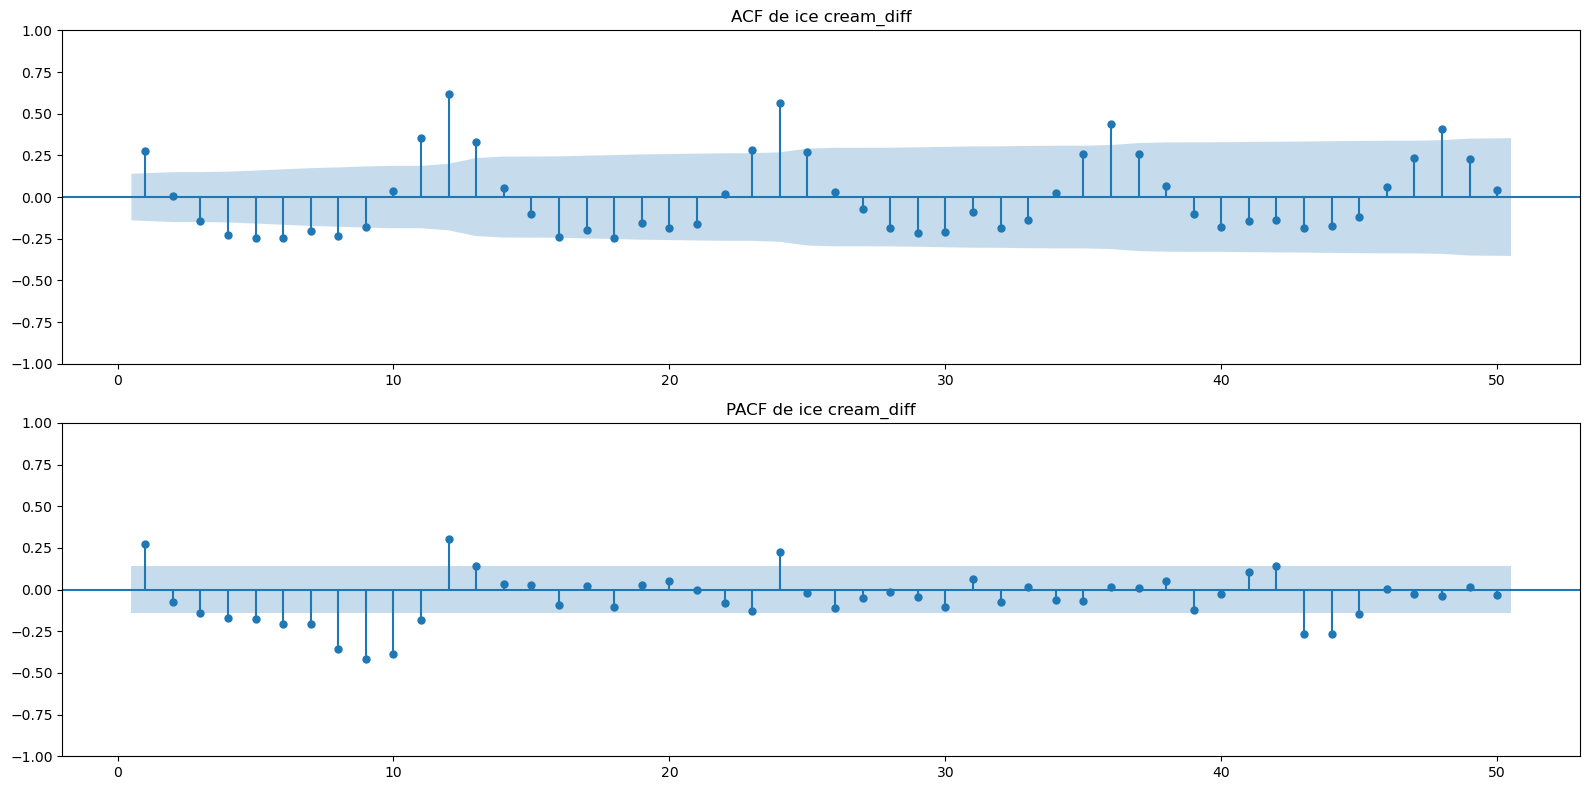

In [22]:
# Faire les tests de Dickey-Fuller augmenté pour les séries différenciées
for column in df_diff.columns:
    result = adfuller(df[column])
    print(f"\nResults for column {column}:")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Faire les graphiques ACF et PACF pour chaque colonne différenciée
for column in df_diff.columns:
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))
    plot_acf(df[column], lags=50, zero=False, ax=ax1)
    ax1.set_title(f"ACF de {column}")
    plot_pacf(df[column], lags=50, zero=False, ax=ax2)
    ax2.set_title(f"PACF de {column}")
    plt.tight_layout()
    plt.show()

# Division de la base en train et en base test

In [23]:
# Définir le point de division
split_point = int(len(df_diff) * 0.9)  # 90% des données pour l'entraînement

# Diviser les données
df_train = df_diff.iloc[:split_point]
df_test = df_diff.iloc[split_point:]

# Vérifier les tailles des ensembles d'entraînement et de test
print('Training set:', len(df_train))
print('Test set:', len(df_test))

Training set: 177
Test set: 20


# Choix du p optimal



Pour un modèle VAR, le choix de l'ordre (p) est une étape cruciale. L'ordre du modèle VAR est le nombre de retards des séries temporelles à inclure dans le modèle. Plusieurs critères peuvent être utilisés pour déterminer l'ordre optimal, y compris le critère d'information d'Akaike (AIC), le critère d'information bayésien (BIC), le critère d'erreur de prédiction finale (FPE), et le critère d'information d'Hannan-Quinn (HQIC).

## Akaike Information Criterion (AIC)

L'AIC est une mesure de la qualité d'un modèle statistique. Pour un modèle donné, l'AIC prend en compte à la fois la complexité du modèle (nombre de paramètres) et la capacité du modèle à expliquer les données (la vraisemblance). Un modèle avec un AIC plus petit est généralement préféré.

## Bayesian Information Criterion (BIC)

Le BIC est similaire à l'AIC, mais il pénalise plus fortement les modèles avec plus de paramètres. Cela signifie que le BIC favorise des modèles plus simples que l'AIC.

## Final Prediction Error (FPE)

Le FPE est une autre mesure de la qualité du modèle qui prend en compte le nombre de paramètres du modèle. Comme l'AIC et le BIC, un modèle avec un FPE plus petit est généralement préféré.

## Hannan-Quinn Information Criterion (HQIC)

Le HQIC est une autre mesure qui pénalise la complexité du modèle. Il est similaire à l'AIC et au BIC, mais il pénalise moins fortement les modèles avec plus de paramètres que le BIC.

Dans la pratique, l'AIC, le BIC, le FPE et le HQIC peuvent donner des ordres optimaux différents. En général, il est conseillé de choisir le modèle avec le plus petit critère d'information, bien qu'il puisse être utile de vérifier la performance de prédiction du modèle pour différents ordres.



In [24]:
# Choisir l'ordre optimal du modèle VAR
model = VAR(df_train)

# Choisir l'ordre optimal p pour le modèle VAR
order_selection = model.select_order(maxlags=12)
order_selection.summary()


/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,7.410,7.447,1652.,7.425
1,7.135,7.248,1255.,7.181
2,7.032,7.221,1133.,7.109
3,6.811,7.074,907.8,6.918
4,6.392,6.731,597.4,6.530
5,6.006,6.421,406.2,6.175
6,5.572,6.062,263.2,5.771
7,5.477,6.042,239.4,5.707
8,5.332,5.972,207.1,5.591
9,5.243,5.959*,189.7,5.534


In [25]:

# L'ordre optimal est donné par le critère d'information d'Akaike (AIC) ou le critère d'information bayésien (BIC) 
optimal_order_aic = order_selection.aic
optimal_order_bic = order_selection.bic
optimal_order_fpe = order_selection.fpe
optimal_order_hqic = order_selection.hqic

print(f"P optimal avec AIC: {optimal_order_aic}")
print(f"P optimal avec BIC: {optimal_order_bic}")
print(f"P optimal avec FPE: {optimal_order_fpe}")
print(f"P optimal avec HQIC: {optimal_order_hqic}")

P optimal avec AIC: 12
P optimal avec BIC: 9
P optimal avec FPE: 12
P optimal avec HQIC: 12


# Estimation du modèle

In [26]:
# Créer le modèle VAR
model = VAR(df_train)

# Choisir un ordre 4
results = model.fit(4)

# Voir un sommaire des résultats
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Jun, 2023
Time:                     22:04:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.64190
Nobs:                     173.000    HQIC:                   6.44691
Log likelihood:          -1019.10    FPE:                    552.248
AIC:                      6.31381    Det(Omega_mle):         498.981
--------------------------------------------------------------------
Results for equation heater_diff
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.296081         0.296108            1.000           0.317
L1.heater_diff            0.051466         0.069922            0.736           0.462
L1.ice cream_diff        -0.265600    

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Validation du modèle

In [27]:
# Obtenir les résidus
residuals = results.resid
residuals

,heater_diff,ice cream_diff
Month,,
2004-06-01,-3.294740,0.744536
2004-07-01,-0.454610,3.274855
2004-08-01,2.073004,-5.046869
2004-09-01,-0.038551,0.753504
2004-10-01,1.877322,-1.410982
...,...,...
2018-06-01,-5.511825,3.696492
2018-07-01,3.708313,16.897642
2018-08-01,5.131693,-17.414972


/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


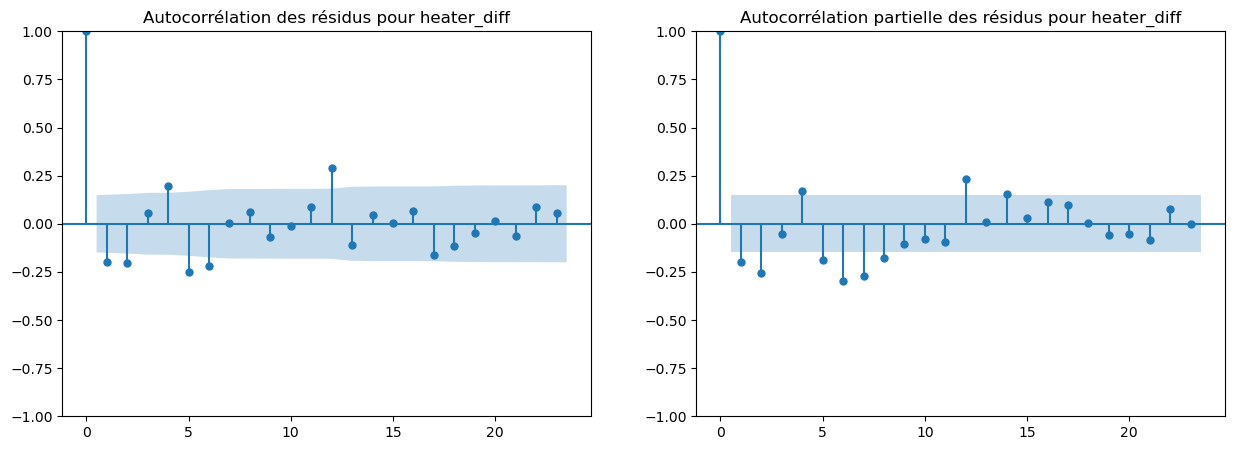

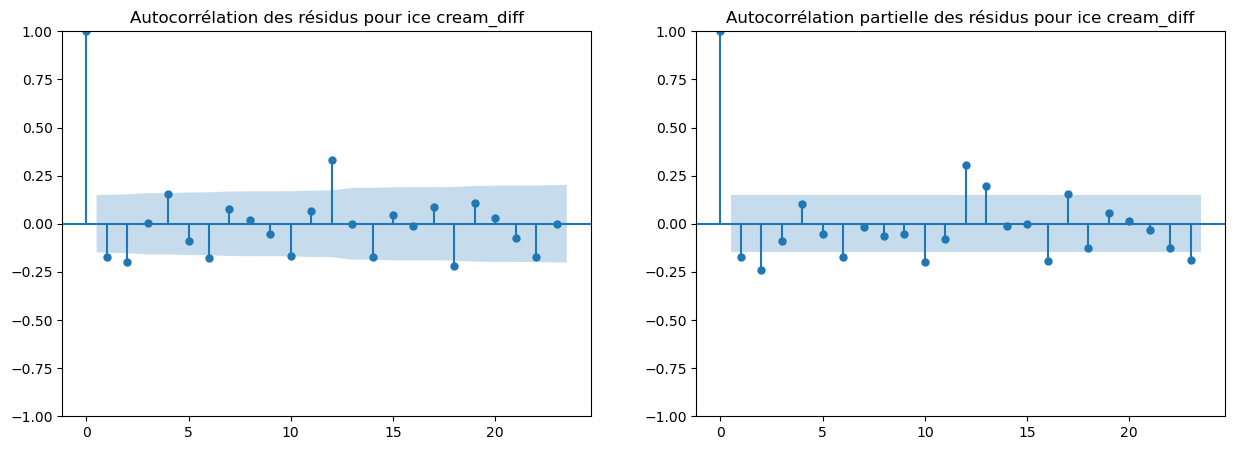

In [28]:
# Tracer l'ACF et le PACF pour chaque série de résidus
for col in residuals.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    plot_acf(residuals[col], ax=axes[0])
    axes[0].set_title(f'Autocorrélation des résidus pour {col}')
    
    plot_pacf(residuals[col], ax=axes[1])
    axes[1].set_title(f'Autocorrélation partielle des résidus pour {col}')

plt.show()

In [29]:
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
# Effectuer des tests sur les résidus
for col in residuals.columns:
    print(f"Résidus pour {col}:")
    jb_test = jarque_bera(residuals[col])
    print(f"Test de Jarque-Bera: statistic={jb_test[0]}, p-value={jb_test[1]}")
    


Résidus pour heater_diff:
Test de Jarque-Bera: statistic=118.80461006939383, p-value=1.591866748372861e-26
Résidus pour ice cream_diff:
Test de Jarque-Bera: statistic=68.34253122807313, p-value=1.444135367487236e-15


In [30]:
# Préparer un tableau pour stocker les résultats
results_df = pd.DataFrame(columns=['Variable', 'Lag', 'LB Statistic', 'LB P-value'])

# Effectuer le test de Ljung-Box pour des décalages de 1 à 12
for col in residuals.columns:
    for lag in range(1, 13):
        lb_test = acorr_ljungbox(residuals[col], lags=[lag], return_df=True)
        results_df = results_df.append({
            'Variable': col,
            'Lag': lag,
            'LB Statistic': lb_test['lb_stat'].values[0],
            'LB P-value': lb_test['lb_pvalue'].values[0]
        }, ignore_index=True)

# Afficher les résultats
print(results_df)

          Variable Lag  LB Statistic    LB P-value
0      heater_diff   1      6.916489  8.540448e-03
1      heater_diff   2     14.146339  8.475427e-04
2      heater_diff   3     14.669045  2.122470e-03
3      heater_diff   4     21.751889  2.245461e-04
4      heater_diff   5     33.211352  3.416688e-06
5      heater_diff   6     41.897667  1.926330e-07
6      heater_diff   7     41.900067  5.435500e-07
7      heater_diff   8     42.583246  1.052280e-06
8      heater_diff   9     43.449097  1.782649e-06
9      heater_diff  10     43.464985  4.105778e-06
10     heater_diff  11     44.907524  5.037270e-06
11     heater_diff  12     60.655214  1.714137e-08
12  ice cream_diff   1      5.252990  2.190909e-02
13  ice cream_diff   2     12.360542  2.069867e-03
14  ice cream_diff   3     12.364741  6.232649e-03
15  ice cream_diff   4     16.743276  2.168000e-03
16  ice cream_diff   5     18.112093  2.809153e-03
17  ice cream_diff   6     23.789322  5.709635e-04
18  ice cream_diff   7     24.8

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_1405/3715744284.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_1405/3715744284.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_1405/3715744284.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_1405/3715744284.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var

# Prédiction train et test

In [31]:

# Prévoir les valeurs sur l'ensemble d'entraînement
# Prédictions sur les ensembles d'entraînement et de test
train_pred = results.fittedvalues
test_pred = results.forecast(df_train.values, steps=len(df_test))

In [32]:
# Créer un DataFrame avec les prédictions
train_pred_df = pd.DataFrame(train_pred, columns=df_train.columns)
train_pred_df['Date'] = df_diff.index[4:len(df_train)]  # Ajouter les dates correspondant à l'ensemble d'entraînement
train_pred_df.set_index('Date', inplace=True)  # Utiliser les dates comme indices

test_pred_df = pd.DataFrame(test_pred, columns=df_train.columns)
test_pred_df['Date'] = df_diff.index[len(df_train):]  # Ajouter les dates correspondant à l'ensemble d'entraînement
test_pred_df.set_index('Date', inplace=True)  # Utiliser les dates comme indices


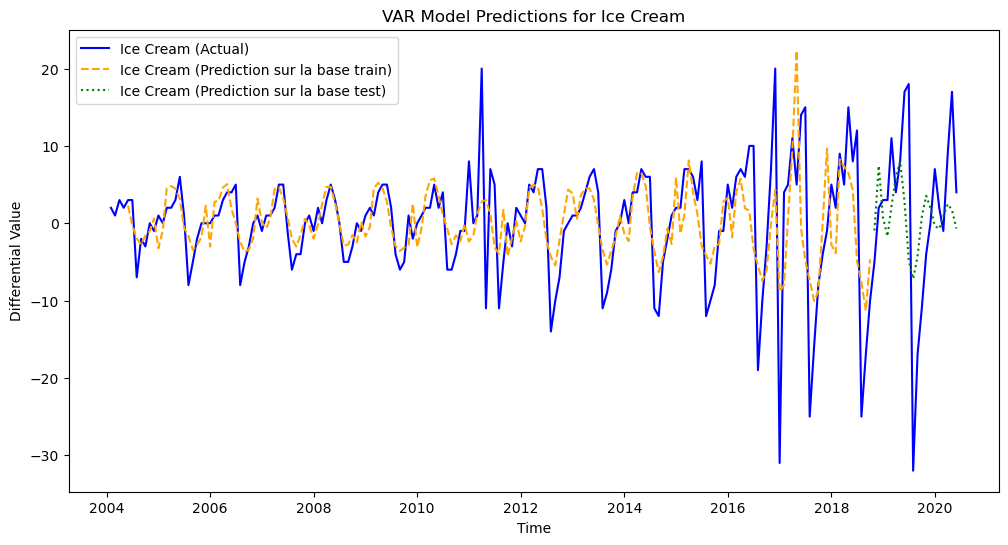

In [33]:
# Graphique pour Ice Cream
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['ice cream_diff'], label='Ice Cream (Actual)', color='blue')
plt.plot(train_pred_df.index, train_pred_df['ice cream_diff'], label='Ice Cream (Prediction sur la base train)', linestyle='dashed', color='orange')
plt.plot(test_pred_df.index, test_pred_df['ice cream_diff'], label='Ice Cream (Prediction sur la base test)', linestyle='dotted', color='green')
plt.xlabel('Time')
plt.ylabel('Differential Value')
plt.title('VAR Model Predictions for Ice Cream')
plt.legend()
plt.show()


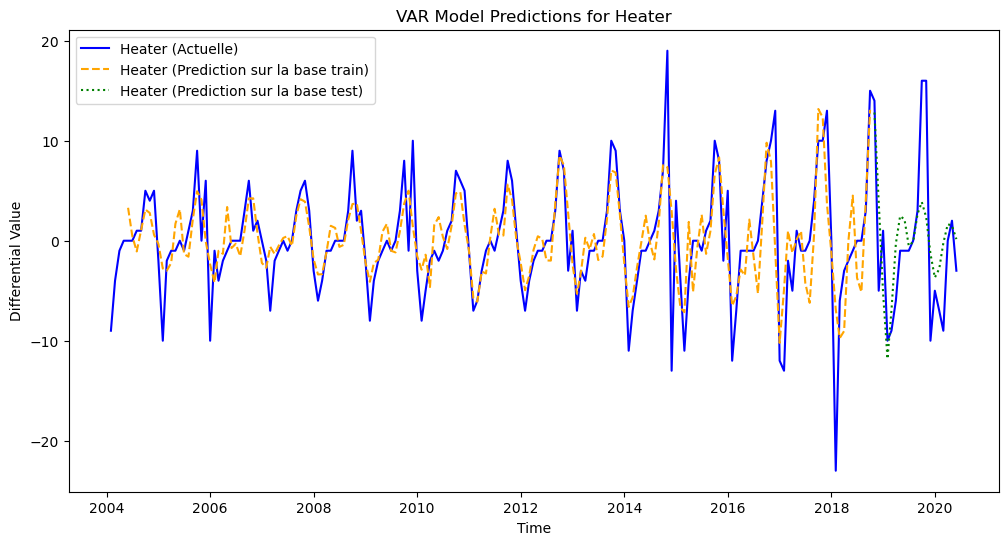

In [34]:
# Graphique pour Heater
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['heater_diff'], label='Heater (Actuelle)', color='blue')
plt.plot(train_pred_df.index, train_pred_df['heater_diff'], label='Heater (Prediction sur la base train)', linestyle='dashed', color='orange')
plt.plot(test_pred_df.index, test_pred_df['heater_diff'], label='Heater (Prediction sur la base test)', linestyle='dotted', color='green')
plt.xlabel('Time')
plt.ylabel('Differential Value')
plt.title('VAR Model Predictions for Heater')
plt.legend()
plt.show()